## Inception Model

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os
import inception

In [2]:
#Load inception model
inception.data_dir = '/home/vijay/workspace/ml/databases/models/inception3/'
model = inception.Inception()

In [3]:
from PIL import Image
def classify(image_path):
    # Display the image.
    #display(Image(image_path))
    im = Image.open(image_path)
    im.show()

    # Use the Inception model to classify the image.
    pred = model.classify(image_path=image_path)

    # Print the scores and names for the top-10 predictions.
    model.print_scores(pred=pred, k=10, only_first_name=True)    

In [5]:
image_path = os.path.join(inception.data_dir, 'cropped_panda.jpg')
classify(image_path)

89.11% : giant panda
 0.78% : indri
 0.30% : lesser panda
 0.15% : custard apple
 0.12% : earthstar
 0.09% : sea urchin
 0.05% : forklift
 0.05% : digital watch
 0.05% : gibbon
 0.05% : go-kart


# Transfer learning on a CIFAR-10 dataset

In [6]:
import cifar10
from cifar10 import num_classes
cifar10.data_path = '/home/vijay/workspace/ml/databases/cifar-10/'
class_names = cifar10.load_class_names()

Loading data: /home/vijay/workspace/ml/databases/cifar-10/cifar-10-batches-py/batches.meta


In [7]:
class_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [8]:
images_train, cls_train, labels_train = cifar10.load_training_data()

Loading data: /home/vijay/workspace/ml/databases/cifar-10/cifar-10-batches-py/data_batch_1
Loading data: /home/vijay/workspace/ml/databases/cifar-10/cifar-10-batches-py/data_batch_2
Loading data: /home/vijay/workspace/ml/databases/cifar-10/cifar-10-batches-py/data_batch_3
Loading data: /home/vijay/workspace/ml/databases/cifar-10/cifar-10-batches-py/data_batch_4
Loading data: /home/vijay/workspace/ml/databases/cifar-10/cifar-10-batches-py/data_batch_5


In [9]:
images_test, cls_test, labels_test = cifar10.load_test_data()

Loading data: /home/vijay/workspace/ml/databases/cifar-10/cifar-10-batches-py/test_batch


In [10]:
print("Size of:")
print("- Training-set:\t\t{}".format(len(images_train)))
print("- Test-set:\t\t{}".format(len(images_test)))

Size of:
- Training-set:		50000
- Test-set:		10000


In [11]:
def plot_images(images, cls_true, cls_pred=None, smooth=True):

    assert len(images) == len(cls_true)

    # Create figure with sub-plots.
    fig, axes = plt.subplots(3, 3)

    # Adjust vertical spacing.
    if cls_pred is None:
        hspace = 0.3
    else:
        hspace = 0.6
    fig.subplots_adjust(hspace=hspace, wspace=0.3)

    # Interpolation type.
    if smooth:
        interpolation = 'spline16'
    else:
        interpolation = 'nearest'

    for i, ax in enumerate(axes.flat):
        # There may be less than 9 images, ensure it doesn't crash.
        if i < len(images):
            # Plot image.
            ax.imshow(images[i],
                      interpolation=interpolation)

            # Name of the true class.
            cls_true_name = class_names[cls_true[i]]

            # Show true and predicted classes.
            if cls_pred is None:
                xlabel = "True: {0}".format(cls_true_name)
            else:
                # Name of the predicted class.
                cls_pred_name = class_names[cls_pred[i]]

                xlabel = "True: {0}\nPred: {1}".format(cls_true_name, cls_pred_name)

            # Show the classes as the label on the x-axis.
            ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

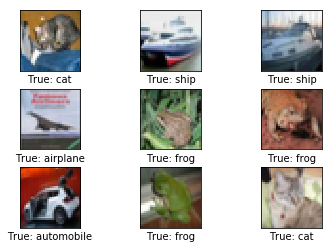

In [12]:
# Get the first images from the test-set.
images = images_test[0:9]

# Get the true classes for those images.
cls_true = cls_test[0:9]

# Plot the images and labels using our helper-function above.
plot_images(images=images, cls_true=cls_true, smooth=False)

In [13]:
from inception import transfer_values_cache

In [14]:
file_path_cache_train = os.path.join(cifar10.data_path, 'inception_cifar10_train.pkl')
file_path_cache_test = os.path.join(cifar10.data_path, 'inception_cifar10_test.pkl')

In [15]:
print("Processing Inception transfer-values for training-images ...")

# Scale images because Inception needs pixels to be between 0 and 255,
# while the CIFAR-10 functions return pixels between 0.0 and 1.0
images_scaled = images_train * 255.0

# If transfer-values have already been calculated then reload them,
# otherwise calculate them and save them to a cache-file.
transfer_values_train = transfer_values_cache(cache_path=file_path_cache_train,
                                              images=images_scaled,
                                              model=model)

Processing Inception transfer-values for training-images ...
- Data loaded from cache-file: /home/vijay/workspace/ml/databases/cifar-10/inception_cifar10_train.pkl


In [16]:
print("Processing Inception transfer-values for test-images ...")

# Scale images because Inception needs pixels to be between 0 and 255,
# while the CIFAR-10 functions return pixels between 0.0 and 1.0
images_scaled = images_test * 255.0

# If transfer-values have already been calculated then reload them,
# otherwise calculate them and save them to a cache-file.
transfer_values_test = transfer_values_cache(cache_path=file_path_cache_test,
                                             images=images_scaled,
                                             model=model)

Processing Inception transfer-values for test-images ...
- Data loaded from cache-file: /home/vijay/workspace/ml/databases/cifar-10/inception_cifar10_test.pkl


In [17]:
transfer_values_train.shape

(50000, 2048)

In [18]:
def plot_transfer_values(i):
    print("Input image:")
    
    # Plot the i'th image from the test-set.
    plt.imshow(images_test[i], interpolation='nearest')
    plt.show()

    print("Transfer-values for the image using Inception model:")
    
    # Transform the transfer-values into an image.
    img = transfer_values_test[i]
    img = img.reshape((32, 64))

    # Plot the image for the transfer-values.
    plt.imshow(img, interpolation='nearest', cmap='Reds')
    plt.show()

Input image:


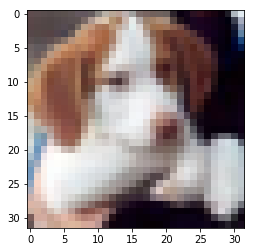

Transfer-values for the image using Inception model:


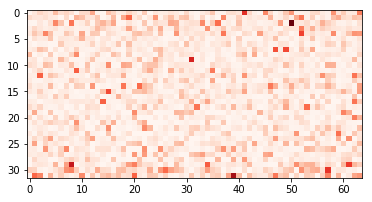

In [19]:
%matplotlib inline
plot_transfer_values(i=16)

## Analysis of Transfer-Values using t-SNE

In [ ]:

from sklearn.decomposition import PCA
pca = PCA(n_components=50) # convert to PCA and then to t-sne as the later is very slowt
transfer_values = transfer_values_train[0:3000]
cls = cls_train[0:3000]
transfer_values_50d = pca.fit_transform(transfer_values)


In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
transfer_values_reduced = tsne.fit_transform(transfer_values_50d) 
transfer_values_reduced.shape